## Introduction

We have dataset containing **Diabates** informations From (**The National Institute of Diabetes and Digestive and Kidney Diseases**).We know how challenging it's to handle or deal with **Diabetes** and in india we have many more persons with Diabates, we will try to find out how to prevent or what steps diabetic patient can take.
We will explore the dataset by performing exploration technique(**EDA**) then will perform **Feature selection** process then will move to model selection and after that we will see **Performance matrics** to chk our model accuracy , if we are satisfied with the accuracy then we wil go ahead with model **Deployment**  

We will predict if a person have diabetes or not solve classification problem here

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('~/Downloads/diabetes_mandatory_project.csv') # was getting encoder error so i've used "encoding=latin-1"
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Basic Exploration

In [5]:
df.isnull().sum() # checking how many null values are present 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info() # checking data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

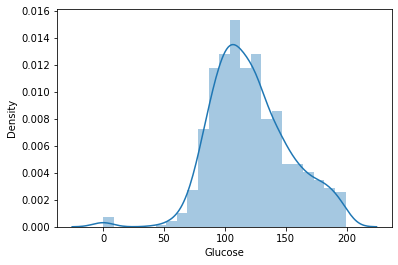

In [7]:
sns.distplot(df['Glucose']) # distribution of Glucose data is not skewed we can see that

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

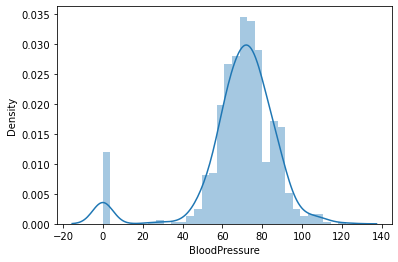

In [8]:
sns.distplot(df['BloodPressure']) # blood pressure also normally distributed 

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

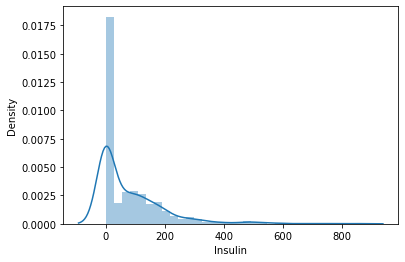

In [9]:
sns.distplot(df['Insulin'])

***We can see from the above graph that some values are 0 in Blood pressure & other feature which is wrong,
we will see how we can handle this***

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

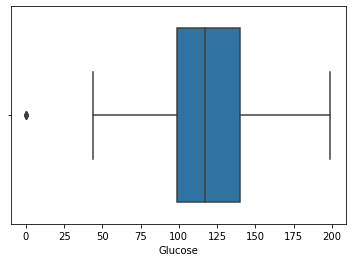

In [11]:
sns.boxplot(df['Glucose']) # Glucose is 0 for a living person, this cant be , we will see later

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure'>

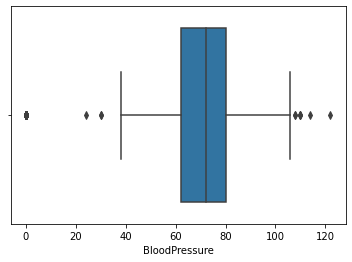

In [12]:
sns.boxplot(df['BloodPressure']) # blood pressure also have 0 values

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SkinThickness'>

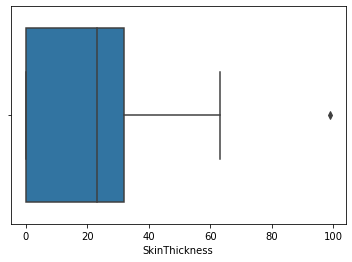

In [13]:
sns.boxplot(df['SkinThickness'])

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

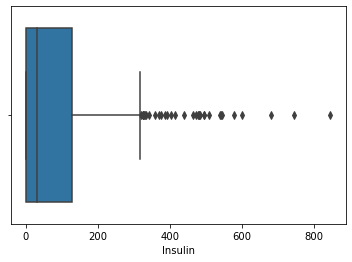

In [14]:
sns.boxplot(df['Insulin'])

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

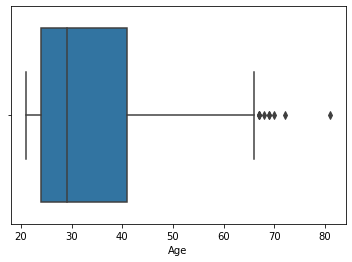

In [15]:
sns.boxplot(df['Age'])

In [16]:
# We have some outliers also in this dataset and 
# We have 0 values in multiple features, will deal with them  

In [17]:
df.groupby('Outcome').size() 

Outcome
0    500
1    268
dtype: int64

In [18]:
df.reset_index(inplace=True,drop=True)

In [19]:
df.head() # we have output feature is "Outcome" as 0 and 1 value

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.isna().sum() # don't have any NA values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0, 0.5, 'Age')

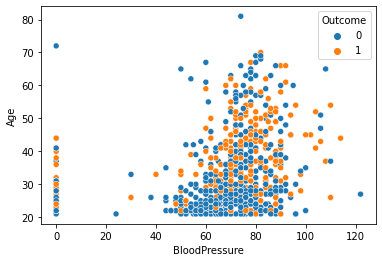

In [21]:
sns.scatterplot(x='BloodPressure', y= 'Age', hue='Outcome',data=df)

plt.xlabel('BloodPressure') 
plt.ylabel('Age')

**We can see from above graph that there is no linear relationship**

Text(0, 0.5, 'Age')

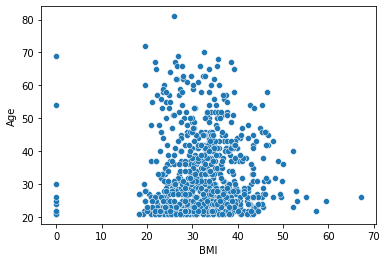

In [22]:
sns.scatterplot(x='BMI', y= 'Age', data=df)

plt.xlabel('BMI') # lets see if there is any relation between Age & BMI
plt.ylabel('Age')

we can see mostly datapoints are lying between Age 18 to 45 or so

In [23]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot:>

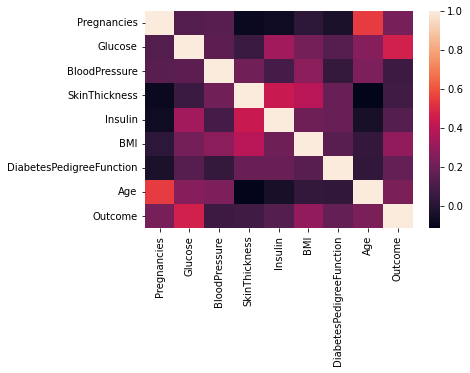

In [24]:
# lets see the corelations using heatmap between columns if there is any.

corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

brighter color means more corelation.There is corelation between age and pregnancies & 

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

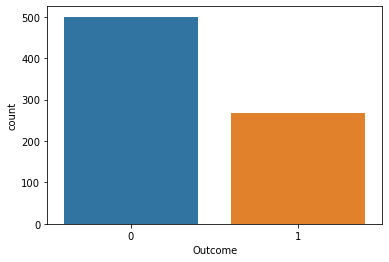

In [25]:
sns.countplot('Outcome',data=df) # we can see non-diabetic person are more than diabetic person

<AxesSubplot:xlabel='Age', ylabel='Outcome'>

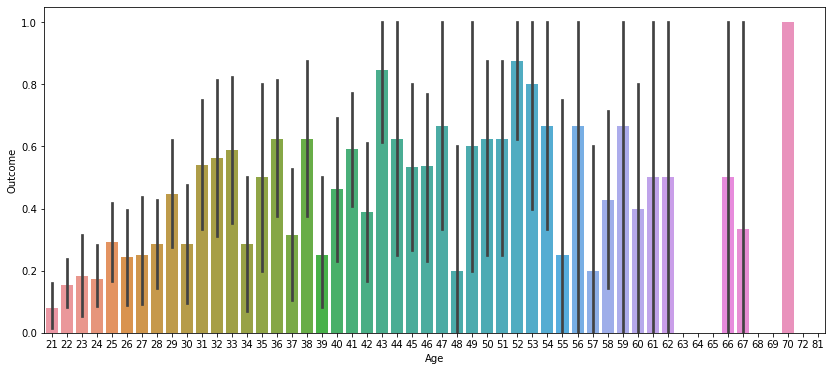

In [26]:
# Lets see between "Outcome" and "Age" feature..

plt.figure(figsize=(14,6))
sns.barplot(x='Age',y='Outcome',data=df)

In [27]:

(df['BloodPressure'] == 0).value_counts()


False    733
True      35
Name: BloodPressure, dtype: int64

**A living person's Blood_Pressure can't be 0 so it's wrong value and we have 35 of them**

In [28]:
(df['Insulin']==0).value_counts() # 

False    394
True     374
Name: Insulin, dtype: int64

In [29]:
(df['SkinThickness']==0).value_counts()

False    541
True     227
Name: SkinThickness, dtype: int64

In [30]:
(df['Glucose']==0).value_counts()

False    763
True       5
Name: Glucose, dtype: int64

We can see from above analysis..
  - In a rare case Insulin can be 0 of a person, but observing the data we have 374
  - Skin Thickness can't be less than 10 for a normal person
  - Glucose level can't be 0 , its a invalid reading.
  
**We can handle 0 values in multple ways**

  - We can remove/ignore 0 values in other senarios but we may lose valuable info
  - Using avg/mean value we can use but in our senario it wolud send wrong singnal to model
  
At the end of the data cleaning process, we have come to the conclusion that this given data set is incomplete. but with some minor adjustments we can go ahead.

**will remove the rows which “BloodPressure”, “BMI” and “Glucose” are 0** 

In [31]:
# Lets seprate our Dependent feature and Independent feature....

feature_columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predicted_class=['Outcome']

In [32]:
from sklearn.model_selection import train_test_split

x=df[feature_columns].values
y=df[predicted_class].values


x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=10)

## Lets see how many Missing(zero) values present in the dataset

In [33]:
print('total no of rows: {0}'.format (len(df)))


print('missing glucose:{0}'.format(len(df.loc[df['Glucose']==0])))

print('missing Pregnancies:{0}'.format(len(df.loc[df['Pregnancies']==0])))
print('missing bloodPressure:{0}'.format(len(df.loc[df['BloodPressure']==0])))
print('missing SkinThickness:{0}'.format(len(df.loc[df['SkinThickness']==0])))
print('missing insulin:{0}'.format(len(df.loc[df['Insulin']==0])))
print('missing bmi:{0}'.format(len(df.loc[df['BMI']==0])))
print('missing diabetespedigreefunction:{0}'.format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print('missing age:{0}'.format(len(df.loc[df['Age']==0])))

total no of rows: 768
missing glucose:5
missing Pregnancies:111
missing bloodPressure:35
missing SkinThickness:227
missing insulin:374
missing bmi:11
missing diabetespedigreefunction:0
missing age:0


In [34]:
from sklearn.impute import SimpleImputer

In [35]:
values= SimpleImputer(missing_values=0,strategy='mean')

x_train=values.fit_transform(x_train)
x_test=values.fit_transform(x_test) 

In [36]:
## Apply algorthm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(x_train,y_train.ravel())

RandomForestClassifier(random_state=10)

In [37]:
predict_train_data= random_forest_model.predict(x_test)

from sklearn import metrics
print('Accuracy= {0:.3f}'.format(metrics.accuracy_score(y_test,predict_train_data)))

Accuracy= 0.766


### .......................

### Model selection

**We will import some classifier for testing the accuracy from sklearn**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [41]:
# fit each model in a loop

names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

  Name     Score
0  KNN  0.692641
1  SVC  0.705628
2   LR  0.748918
3   DT  0.727273
4  GNB  0.731602
5   RF  0.766234
6   GB  0.766234


In [42]:
from sklearn.model_selection import KFold
KFold

sklearn.model_selection._split.KFold

In [43]:
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10,shuffle =True) 
    score = cross_val_score(model, x, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expe

  Name     Score
0  KNN  0.707075
1  SVC  0.753964
2   LR  0.774727
3   DT  0.680844
4  GNB  0.748616
5   RF  0.760390
6   GB  0.747300


/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


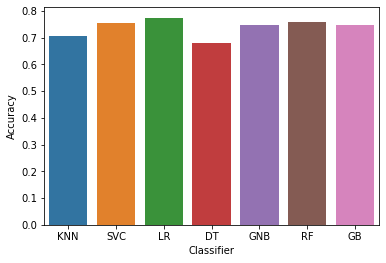

In [44]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
plt.show()

**Logistic Regression having best accuracy**